<a href="https://colab.research.google.com/github/markusloecher/DataScience2021/blob/main/TWSM/Class4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Libraries

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')
#TWSM_path = "/content/drive/MyDrive/teaching/TWSM/WorkInClass/"

#from TWSM import *
from tensorflow import keras
#from tensorflow.keras import layers


In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

### SVD

#### Tasks

1. Compute the SVD for our movie rankings and find the first two eigenvectors for movies and users.
2. Compute the SVD for the MNIST data
3. Reconstruct the digits with a "truncated SVD that captures 80% of the variance"


**Minimal Example for the SVD**

Running this example first prints the defined 3×2 matrix, then the 3×3 U matrix, 2 element Sigma vector, and 2×2 V^T matrix elements calculated from the decomposition.

In [3]:
# Singular-value decomposition
import numpy as np
from scipy.linalg import svd
import pandas as pd
# define a matrix
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A)
# SVD
U, s, VT = svd(A)
print(U)
print(s)
print(VT)

[[1 2]
 [3 4]
 [5 6]]
[[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
[9.52551809 0.51430058]
[[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


In [4]:
mov = pd.read_csv("../mov_rank_bipm.csv")

In [5]:
mov = mov.dropna(axis=0, thresh=18)
mov = mov.dropna(axis=1, thresh=8)
mov


,First Name,Last Name,Princess Diaries,Dumb Dumber,Color Purple,Brave Heart,Narnia,Sense/Sensibility,LiarLiar,Django Unchained,...,Shrek,SE7EN,The Intern,John Wick,Crazy Rich Asians,Call me by your Name,Gone Girl,Prisoners,Nightcrawler,Gran Torino
0,Jafar,Abdurrahmaan,3.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,...,4.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,NaN
1,Moritz Kai Phillip,Deecke,2.0,3.0,4.0,2.0,3.0,3.0,NaN,5.0,...,3.0,5.0,2.0,2.0,1.0,4.0,3.0,4.0,5.0,4.0
3,Felix,Eger,2.0,2.0,3.0,3.0,3.0,2.0,2.0,5.0,...,2.0,5.0,3.0,4.0,2.0,2.0,4.0,3.0,4.0,3.0
6,Rukniya,Gurung,4.0,3.0,4.0,3.0,3.0,3.0,2.0,5.0,...,5.0,3.0,4.0,2.0,4.0,4.0,4.0,4.0,3.0,NaN
7,Lilit,Harutyunyan,3.0,2.0,4.0,2.0,2.0,2.0,2.0,4.0,...,5.0,5.0,5.0,3.0,4.0,5.0,5.0,5.0,3.0,3.0
8,Philipp,Heitmann,3.0,1.0,4.0,1.0,4.0,2.0,1.0,5.0,...,3.0,5.0,5.0,3.0,4.0,3.0,5.0,4.0,5.0,4.0
10,Clemens,Hopf,1.0,1.0,3.0,3.0,3.0,2.0,1.0,4.0,...,3.0,4.0,1.0,4.0,1.0,1.0,1.0,3.0,3.0,4.0
12,Ngoc Huynh Anh,Nguyen,1.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,...,4.0,4.0,2.0,2.0,3.0,2.0,3.0,5.0,5.0,3.0
13,Jonas Alois,Pieper,1.0,2.0,2.0,4.0,3.0,1.0,1.0,5.0,...,2.0,4.0,3.0,4.0,3.0,2.0,3.0,5.0,4.0,5.0
15,Eric,Schley,1.0,1.0,3.0,4.0,2.0,2.0,3.0,5.0,...,5.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,4.0,5.0


In [6]:
m = mov.mean(axis=1)
for i, col in enumerate(mov):
    # using i allows for duplicate columns
    # inplace *may* not always work here, so IMO the next line is preferred
    # df.iloc[:, i].fillna(m, inplace=True)
    mov.iloc[:, i] = mov.iloc[:, i].fillna(m)
mov

,First Name,Last Name,Princess Diaries,Dumb Dumber,Color Purple,Brave Heart,Narnia,Sense/Sensibility,LiarLiar,Django Unchained,...,Shrek,SE7EN,The Intern,John Wick,Crazy Rich Asians,Call me by your Name,Gone Girl,Prisoners,Nightcrawler,Gran Torino
0,Jafar,Abdurrahmaan,3.0,2.0,4.0,2.0,2.0,3.0,3.000000,4.0,...,4.0,4.0,5.0,5.0,5.0,5.0,4.0,4.0,3.0,3.611111
1,Moritz Kai Phillip,Deecke,2.0,3.0,4.0,2.0,3.0,3.0,3.333333,5.0,...,3.0,5.0,2.0,2.0,1.0,4.0,3.0,4.0,5.0,4.000000
3,Felix,Eger,2.0,2.0,3.0,3.0,3.0,2.0,2.000000,5.0,...,2.0,5.0,3.0,4.0,2.0,2.0,4.0,3.0,4.0,3.000000
6,Rukniya,Gurung,4.0,3.0,4.0,3.0,3.0,3.0,2.000000,5.0,...,5.0,3.0,4.0,2.0,4.0,4.0,4.0,4.0,3.0,3.500000
7,Lilit,Harutyunyan,3.0,2.0,4.0,2.0,2.0,2.0,2.000000,4.0,...,5.0,5.0,5.0,3.0,4.0,5.0,5.0,5.0,3.0,3.000000
8,Philipp,Heitmann,3.0,1.0,4.0,1.0,4.0,2.0,1.000000,5.0,...,3.0,5.0,5.0,3.0,4.0,3.0,5.0,4.0,5.0,4.000000
10,Clemens,Hopf,1.0,1.0,3.0,3.0,3.0,2.0,1.000000,4.0,...,3.0,4.0,1.0,4.0,1.0,1.0,1.0,3.0,3.0,4.000000
12,Ngoc Huynh Anh,Nguyen,1.0,2.0,2.0,2.0,2.0,2.0,2.000000,3.0,...,4.0,4.0,2.0,2.0,3.0,2.0,3.0,5.0,5.0,3.000000
13,Jonas Alois,Pieper,1.0,2.0,2.0,4.0,3.0,1.0,1.000000,5.0,...,2.0,4.0,3.0,4.0,3.0,2.0,3.0,5.0,4.0,5.000000
15,Eric,Schley,1.0,1.0,3.0,4.0,2.0,2.0,3.000000,5.0,...,5.0,3.0,3.0,3.0,3.0,3.0,3.0,5.0,4.0,5.000000


In [7]:
U, s, VT = svd(mov[mov.columns[2:]])

In [8]:
mov["First Name"]

0                  Jafar
1     Moritz Kai Phillip
3                  Felix
6                Rukniya
7                  Lilit
8                Philipp
10               Clemens
12        Ngoc Huynh Anh
13           Jonas Alois
15                  Eric
Name: First Name, dtype: object

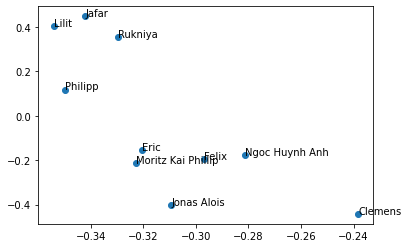

In [9]:
import matplotlib.pyplot as plt

names = mov["First Name"]
fig, ax = plt.subplots()
X = U[:,0]
Y = U[:,1]
ax.scatter(X, Y)

for i, txt in enumerate(names):
    ax.annotate(txt, (X[i], Y[i]))


**Reconstruct Matrix from SVD**

The U, s, and V elements returned from the svd() cannot be multiplied directly.

The s vector must be converted into a diagonal matrix using the diag() function. By default, this function will create a square matrix that is n x n, relative to our original matrix. This causes a problem as the size of the matrices do not fit the rules of matrix multiplication, where the number of columns in a matrix must match the number of rows in the subsequent matrix.

After creating the square Sigma diagonal matrix, the sizes of the matrices are relative to the original m x n matrix that we are decomposing, as follows:

$U (m x m) . Sigma (n x n) . V^T (n x n)$

Where, in fact, we require:

$U (m x m) . Sigma (m x n) . V^T (n x n)$

We can achieve this by creating a new Sigma matrix of all zero values that is m x n (e.g. more rows) and populate the first n x n part of the matrix with the square diagonal matrix calculated via diag().



In [10]:
# Reconstruct SVD

# create m x n Sigma matrix
Sigma = np.zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[1], :A.shape[1]] = np.diag(s)
# reconstruct matrix
B = U.dot(Sigma.dot(VT))
print(B)

ValueError: could not broadcast input array from shape (10,10) into shape (2,2)

The above complication with the Sigma diagonal only exists with the case where m and n are not equal. The diagonal matrix can be used directly when reconstructing a square matrix, as follows.

### Truncated SVD

Data with a large number of features, such as more features (columns) than observations (rows) may be reduced to a smaller subset of features that are most relevant to the prediction problem.

The result is a matrix with a lower rank that is said to approximate the original matrix.

To do this we can perform an SVD operation on the original data and select the top k largest singular values in Sigma. These columns can be selected from Sigma and the rows selected from $V^T$.

An approximate B of the original vector A can then be reconstructed.

$$B = U . Sigma_k . V^T_k$$

In natural language processing, this approach can be used on matrices of word occurrences or word frequencies in documents and is called **Latent Semantic Analysis** or **Latent Semantic Indexing**.



## Data

#### MNIST


In [42]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [43]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [44]:
# flatten data
x_train_flat = np.reshape(x_train, [60_000, 784])[:5000]

In [45]:
x_train_flat.shape

(5000, 784)

In [46]:
U, s, VT = svd(x_train_flat)

In [47]:
# s is a vector right now so you need to convert it
Sigma = np.diag(s)

In [48]:
k = 20 #no of latent factos we keep
m = x_train_flat.shape[0]
n = x_train_flat.shape[1]

Sigma = np.zeros((m, n))
Sigma[:n,:n]=np.diag(s)
Sigma

Xreconstruct = np.dot(U, np.dot(Sigma, VT))
Xreconstruct.shape

(5000, 784)

In [53]:
RMSE = np.sqrt(np.mean((Xreconstruct-x_train_flat)**2))
RMSE 

8.489269658933122e-05

In [50]:
k = 50 #no of latent factos we keep

Sigmak = Sigma[:,:k]
VTk = VT[:k,:]
Xtrunc = np.dot(U, np.dot(Sigmak, VTk))
Xtrunc.shape

(5000, 784)

In [52]:
RMSE = np.sqrt(np.mean((Xtrunc-x_train_flat)**2))
RMSE 

27.330037942983793

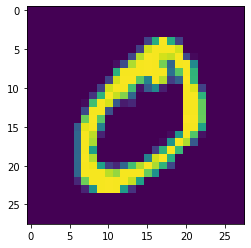

In [58]:
plt. imshow(Xreconstruct[1,:].reshape(28,28))

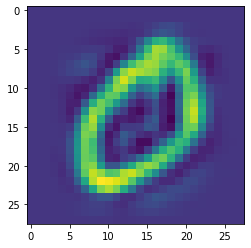

In [57]:
plt.imshow(Xtrunc[1,:].reshape(28,28))